### Decision Trees

## Fitting a Decision Tree

In [2]:
# importing libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call


In [12]:
# importing the dataset
iris = load_iris()

X = iris.data[:, ]
y = iris.target

r = 4
X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.25, random_state=r)


In [4]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(X_train, y_train)
print("Performance without pruning:", unpruned.score(X_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.9736842105263158
At depth: 4


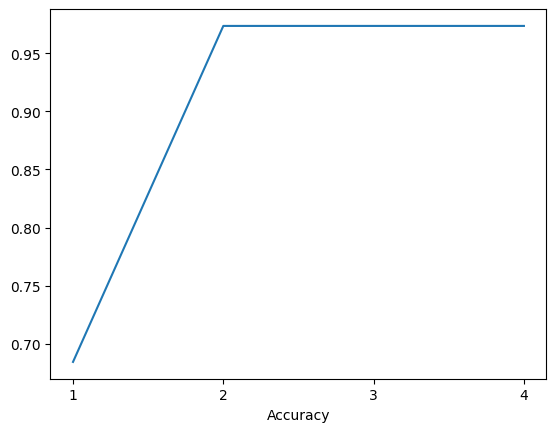

In [5]:
# looking at effect of pruning   
pruned_depths = range(1,unpruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

In [6]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(X, y)

Best performance reached at depth of: 2


DecisionTreeClassifier(max_depth=2)

## Visualisation





### Visualise tree
We can visualise our tree using either Sklearn or Graphviz. The Sklearn tree is very simple in appearance while the Graphviz tree has better aesthetics. However, Graphviz is a little tricky to install, so using it is completely optional. 

If you wish to use Graphviz, follow the install instructions here: https://graphviz.readthedocs.io/en/stable/manual.html and set graphviz_installed = True in the code below.

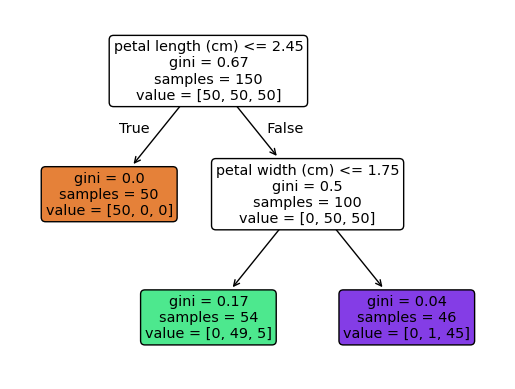

In [7]:
graphviz_installed = False

if (graphviz_installed):
  export_graphviz(pruned, out_file='pruned_tree.dot', feature_names = iris.feature_names,
                  rounded = True, proportion = False, precision = 2, filled = True)
  
  # Convert to png using system command
  call(['dot', '-Tpng', 'pruned_tree.dot', '-o', 'pruned_tree.png', '-Gdpi=600'])
  
else: 
  fig = plt.figure()
  tree.plot_tree(pruned,feature_names = iris.feature_names, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree
  fig.savefig('pruned_tree.png')
  
#Image(filename = 'pruned_tree.png', width=400) #uncomment if using graphviz



### How to visualise the decison tree on a scatter plot.

By visualising our decision tree's prediction on a scatter plot we can see how the model gets more and more specific as the depth of the tree increases.

In [8]:
# isolate only 2 features (sepal width and length) to allow visualisation on a 2d scale
X_sep = iris.data[:,[0,1]]

C:\Users\mshah\AppData\Local\Temp\ipykernel_35068\2322583713.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color, label=iris.target_names[i],
C:\Users\mshah\AppData\Local\Temp\ipykernel_35068\2322583713.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color, label=iris.target_names[i],
C:\Users\mshah\AppData\Local\Temp\ipykernel_35068\2322583713.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color, label=iris.target_names[i],
C:\Users\mshah\AppData\Local\Temp\ipykernel_35068\2322583713.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color, label=iris.target_names[i],


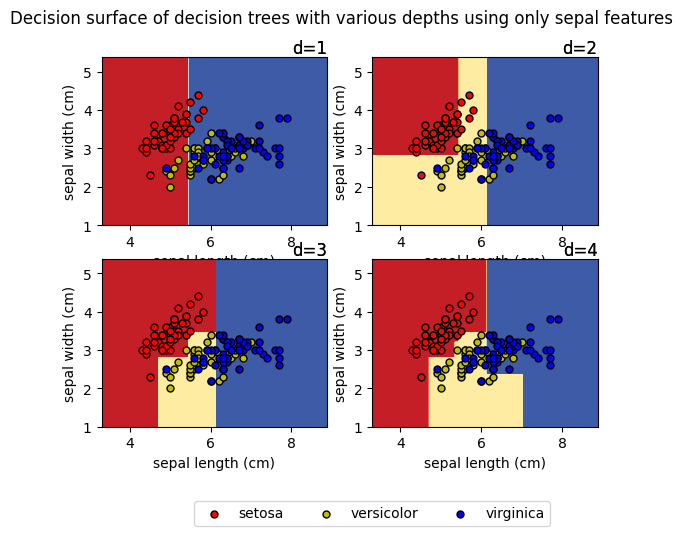

In [9]:
plt.suptitle("Decision surface of decision trees with various depths using only sepal features")

# make subplots for each depth
for idx, d in enumerate(pruned_depths):
  ax = plt.subplot(2, 2, idx+1)

  x_min, x_max = X_sep[:, 0].min() - 1, X_sep[:, 0].max() + 1
  y_min, y_max = X_sep[:, 1].min() - 1, X_sep[:, 1].max() + 1
  
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                       np.arange(y_min, y_max, 0.02))
  clf = DecisionTreeClassifier(max_depth=d).fit(X_sep, y)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[0])
  plt.ylabel(iris.feature_names[1])

  ax.title = plt.title('d={}'.format(d), loc='right', pad=-15)

  # Plot the training points
  for i, color in zip(range(3), "ryb"):
      idx = np.where(y == i)
      plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color, label=iris.target_names[i],
                  cmap=plt.cm.RdYlBu, edgecolor='black', s=25)
  
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0, -0.40))
plt.show()
